In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

file_path = "Violence Against Women  Girls Data.csv"
df = pd.read_csv(file_path)

df['Survey Year'] = pd.to_datetime(df['Survey Year'], errors='coerce')
df['Year'] = df['Survey Year'].dt.year
df = df.drop(columns=['Survey Year'])

demo_pivot = df.pivot_table(
    index=['RecordID', 'Country', 'Gender', 'Year', 'Question'],
    columns='Demographics Question',
    values='Demographics Response',
    aggfunc='first'
).reset_index()
demo_pivot.columns.name = None
demo_pivot = demo_pivot.drop(columns=['Question'])  
value_pivot = df.pivot_table(
    index=['RecordID', 'Country', 'Gender', 'Year'],
    columns='Question',
    values='Value',
    aggfunc='first'
).reset_index()
value_pivot.columns.name = None

full_df = pd.merge(
    demo_pivot,
    value_pivot,
    on=['RecordID', 'Country', 'Gender', 'Year'],
    how='left'
)

encoded_df = full_df.copy()
le = LabelEncoder()
for col in encoded_df.columns:
    if encoded_df[col].dtype == "object":
        encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

encoded_df = encoded_df.fillna(0)

pca_input = encoded_df.drop(columns=['RecordID', 'Year'], errors='ignore')

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(pca_input),
    columns=pca_input.columns
)


df_scaled.info()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  840 non-null    float64
 1   Gender                                   840 non-null    float64
 2   Age                                      840 non-null    float64
 3   Education                                840 non-null    float64
 4   Employment                               840 non-null    float64
 5   Marital status                           840 non-null    float64
 6   Residence                                840 non-null    float64
 7   ... for at least one specific reason     840 non-null    float64
 8   ... if she argues with him               840 non-null    float64
 9   ... if she burns the food                840 non-null    float64
 10  ... if she goes out without telling him  840 non-n

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = "Violence Against Women  Girls Data.csv"
df = pd.read_csv(file_path)

df['Survey Year'] = pd.to_datetime(df['Survey Year'], errors='coerce')
df['Year'] = df['Survey Year'].dt.year
df = df.drop(columns=['Survey Year', 'Country'])

demo_pivot = df.pivot_table(
    index=['RecordID',  'Gender', 'Year', 'Question'],
    columns='Demographics Question',
    values='Demographics Response',
    aggfunc='first'
).reset_index()
demo_pivot.columns.name = None
demo_pivot = demo_pivot.drop(columns=['Question'])

value_pivot = df.pivot_table(
    index=['RecordID',  'Gender', 'Year'],
    columns='Question',
    values='Value',
    aggfunc='first'
).reset_index()
value_pivot.columns.name = None

full_df = pd.merge(
    demo_pivot,
    value_pivot,
    on=['RecordID',  'Gender', 'Year'],
    how='left'
)

categorical_cols = full_df.select_dtypes(include='object').columns

encoded_df = pd.get_dummies(full_df, columns=categorical_cols, drop_first=False)

encoded_df = encoded_df.fillna(0)

pca_input = encoded_df.drop(columns=['RecordID',  'Year'], errors='ignore')

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(pca_input),
    columns=pca_input.columns
)

df_scaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ... for at least one specific reason         840 non-null    float64
 1   ... if she argues with him                   840 non-null    float64
 2   ... if she burns the food                    840 non-null    float64
 3   ... if she goes out without telling him      840 non-null    float64
 4   ... if she neglects the children             840 non-null    float64
 5   ... if she refuses to have sex with him      840 non-null    float64
 6   Gender_F                                     840 non-null    float64
 7   Gender_M                                     840 non-null    float64
 8   Age_15-24                                    840 non-null    float64
 9   Age_25-34                                    840 non-null    float64
 10  Ag

In [36]:
df_scaled.head()

,Country,Gender,Age,Education,Employment,Marital status,Residence,... for at least one specific reason,... if she argues with him,... if she burns the food,... if she goes out without telling him,... if she neglects the children,... if she refuses to have sex with him
0,-1.707481,-1.0,-0.224899,-0.069171,2.871104,3.496613,-0.269809,-0.368251,-0.323681,2.584945,-0.333399,-0.360445,-0.302805
1,-1.707481,1.0,2.594734,-0.069171,5.927792,3.496613,3.706325,-0.368251,-0.323681,1.003170,-0.333399,-0.360445,-0.302805
2,-1.657989,-1.0,-0.224899,-0.069171,-0.185585,3.496613,3.706325,-0.368251,-0.323681,-0.211408,-0.333399,-0.360445,-0.302805
3,-1.657989,1.0,2.594734,14.456832,-0.185585,3.496613,-0.269809,-0.368251,-0.323681,-0.267900,-0.333399,-0.360445,-0.302805
4,-1.608497,-1.0,2.594734,-0.069171,5.927792,3.496613,3.706325,-0.368251,-0.323681,-0.013686,-0.333399,-0.360445,-0.302805


In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=None)
pca_result = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
print("PCA Components shape:", pca_df.shape)
print(pca_df.head())



PCA Components shape: (840, 21)
         PC1        PC2        PC3       PC4       PC5       PC6       PC7  \
0  -6.536791   1.335732   1.916028  1.696919 -5.080297  0.028429  0.194803   
1 -12.445755   1.212137  -1.426435  5.972291  1.943769 -0.108520 -0.179745   
2  -5.790377   2.300420   1.545197  2.820853  0.046570  0.028977  0.027635   
3  -9.488635 -12.017485  14.505824  3.058172  3.409414 -0.125255 -0.284040   
4 -12.412326   3.274644   0.134415  5.240422  2.501869 -0.053204 -0.130277   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0 -0.072560 -0.055793  4.226231  ... -4.675702 -0.475155  0.123295  2.574155   
1  0.011153  0.181648  0.500704  ... -0.406055  2.223888  0.626604  1.805290   
2  0.014455 -0.076835 -0.316198  ... -3.992177 -4.365378  0.333217 -1.630922   
3  0.053560  0.250650  1.922783  ...  5.016802 -4.067864  1.397723  4.133332   
4  0.026261  0.078800 -0.277333  ... -0.214098  2.055243 -0.126218  1.941018   

           PC16   

Top 10 features for PC1:
Residence_Rural                              0.380877
Residence_Urban                              0.380877
Age_15-24                                    0.337665
Employment_Employed for cash                 0.336348
Marital status_Married or living together    0.326179
Employment_Unemployed                        0.281715
Marital status_Never married                 0.278726
Age_25-34                                    0.243101
Age_35-49                                    0.227675
Employment_Employed for kind                 0.179067
Name: PC1, dtype: float64

Top 10 features for PC2:
Gender_F                                       0.540246
Gender_M                                       0.540246
Education_Higher                               0.395625
Education_No education                         0.395625
Marital status_Widowed, divorced, separated    0.184065
Marital status_Never married                   0.118606
Employment_Unemployed                          

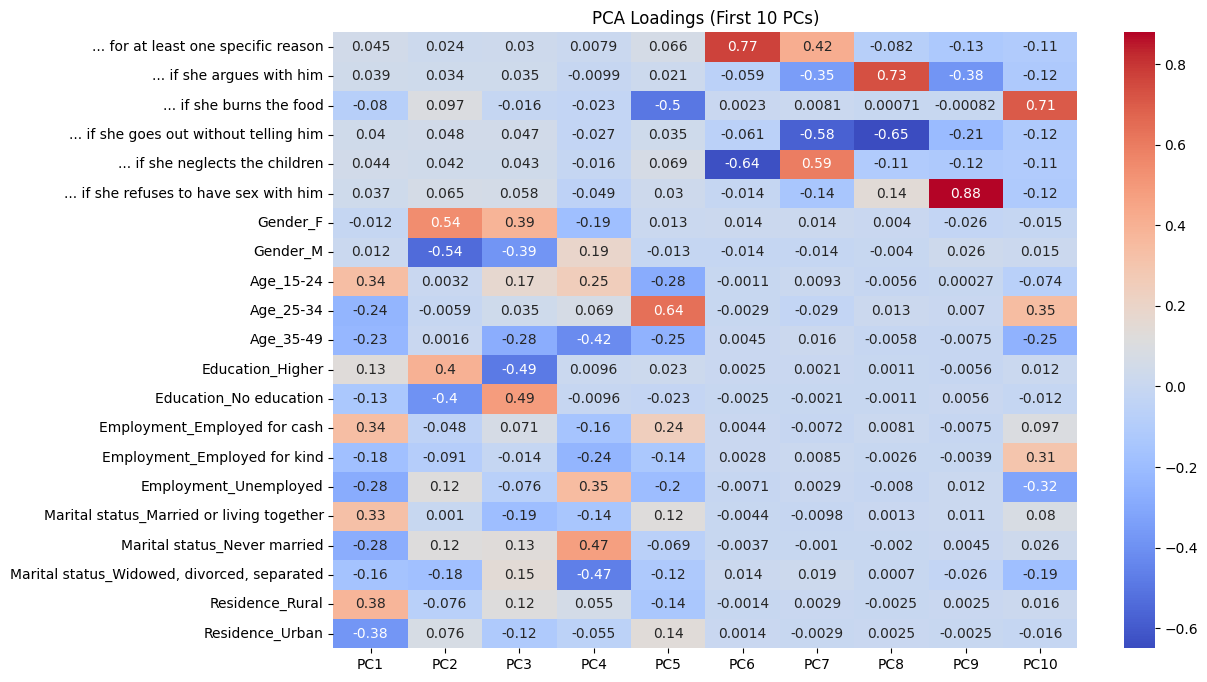

In [49]:
features = df_scaled.columns

loadings = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])])

print("Top 10 features for PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

print("\nTop 10 features for PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(10))

plt.figure(figsize=(12,8))
sns.heatmap(loadings.iloc[:, :10], annot=True, cmap='coolwarm') 
plt.title('PCA Loadings (First 10 PCs)')
plt.show()

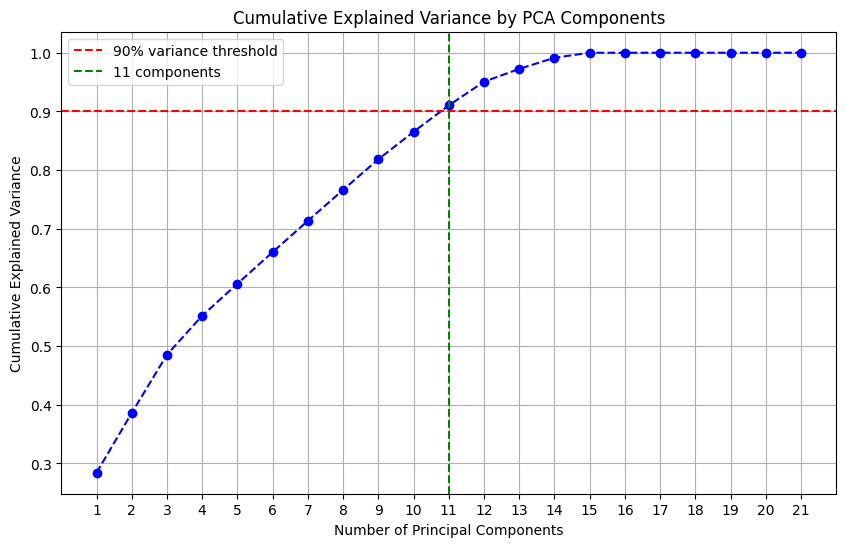

In [50]:
import matplotlib.pyplot as plt
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance threshold')
plt.axvline(x=11, color='g', linestyle='--', label='11 components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance)+1))
plt.legend()
plt.grid(True)
plt.show()


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

output_folder = "pca_plots"
os.makedirs(output_folder, exist_ok=True)

questions = value_pivot.columns[3:] 

for q in questions:
    print(f"\n Performing PCA for Question: {q}")
    if q in df_scaled.columns:
        X_scaled_q = df_scaled.drop(columns=[q])
    else:
        X_scaled_q = df_scaled.copy()

    pca = PCA(n_components=None)
    pca_result = pca.fit_transform(X_scaled_q)

    loadings = pd.DataFrame(
        pca.components_.T,
        index=X_scaled_q.columns,
        columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
    )

    top_features = loadings['PC1'].abs().sort_values(ascending=False).head(5)
    print("Top 5 features influencing PC1:", top_features.to_dict())

    plt.figure(figsize=(12, 6))
    sns.heatmap(loadings.iloc[:, :5], annot=False, cmap='coolwarm')
    plt.title(f'Feature Loadings for Question: {q} (First 5 PCs)')
    plt.tight_layout()

    safe_q = "".join(c if c.isalnum() else "_" for c in q)
    heatmap_filename = f"{output_folder}/PCA_Loadings_{safe_q}.jpg"

    plt.savefig(heatmap_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f" Saved loadings heatmap: {heatmap_filename}")

   
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1),
             cumulative_variance,
             marker='o',
             linestyle='--')
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance threshold')
    plt.title(f'Cumulative Explained Variance for Question: {q}')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(range(1, len(cumulative_variance) + 1))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    variance_filename = f"{output_folder}/PCA_CumulativeVariance_{safe_q}.jpg"

    plt.savefig(variance_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f" Saved cumulative variance plot: {variance_filename}")



🔹 Performing PCA for Question: ... for at least one specific reason
Top 5 features influencing PC1: {'Residence_Rural': 0.38114991774152973, 'Residence_Urban': 0.38114991774152973, 'Age_15-24': 0.3378872175843355, 'Employment_Employed for cash': 0.33671569866228024, 'Marital status_Married or living together': 0.32651063237689676}
📁 Saved loadings heatmap: pca_plots/PCA_Loadings_____for_at_least_one_specific_reason.jpg
📁 Saved cumulative variance plot: pca_plots/PCA_CumulativeVariance_____for_at_least_one_specific_reason.jpg

🔹 Performing PCA for Question: ... if she argues with him
Top 5 features influencing PC1: {'Residence_Rural': 0.38108008511087627, 'Residence_Urban': 0.3810800851108762, 'Age_15-24': 0.3378265340121938, 'Employment_Employed for cash': 0.3366226566099561, 'Marital status_Married or living together': 0.3264310234410718}
📁 Saved loadings heatmap: pca_plots/PCA_Loadings_____if_she_argues_with_him.jpg
📁 Saved cumulative variance plot: pca_plots/PCA_CumulativeVariance_

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

output_folder = "pca_plots"
os.makedirs(output_folder, exist_ok=True)

question_cols = value_pivot.columns[3:]  
non_question_cols = [c for c in df_scaled.columns if c not in question_cols]

print(f"Non-question predictor columns used in PCA: {len(non_question_cols)}")

for q in question_cols:
    print(f"\n Performing PCA for Question: {q}")

    X_scaled_q = df_scaled[non_question_cols].copy()
    pca = PCA(n_components=None)
    pca_result = pca.fit_transform(X_scaled_q)
    loadings = pd.DataFrame(
        pca.components_.T,
        index=X_scaled_q.columns,
        columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
    )

    top_features = loadings['PC1'].abs().sort_values(ascending=False).head(5)
    print("Top 5 features influencing PC1:", top_features.to_dict())
    plt.figure(figsize=(12, 6))
    sns.heatmap(loadings.iloc[:, :5], annot=False, cmap='coolwarm')
    plt.title(f'Feature Loadings for Question: {q} (First 5 PCs)')
    plt.tight_layout()

    safe_q = "".join(c if c.isalnum() else "_" for c in q)
    heatmap_filename = f"{output_folder}/PCA_Loadings_{safe_q}.jpg"

    plt.savefig(heatmap_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f" Saved loadings heatmap: {heatmap_filename}")

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1),
             cumulative_variance,
             marker='o',
             linestyle='--')
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance threshold')
    plt.title(f'Cumulative Explained Variance for Question: {q}')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(range(1, len(cumulative_variance) + 1))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    variance_filename = f"{output_folder}/PCA_CumulativeVariance_{safe_q}.jpg"

    plt.savefig(variance_filename, dpi=300, bbox_inches='tight')
    plt.close()
    print(f" Saved cumulative variance plot: {variance_filename}")


Non-question predictor columns used in PCA: 15

🔹 Performing PCA for Question: ... for at least one specific reason
Top 5 features influencing PC1: {'Residence_Rural': 0.383560822425411, 'Residence_Urban': 0.383560822425411, 'Age_15-24': 0.3399958837939454, 'Employment_Employed for cash': 0.33871907315327354, 'Marital status_Married or living together': 0.32857162882100416}
📁 Saved loadings heatmap: pca_plots/PCA_Loadings_____for_at_least_one_specific_reason.jpg
📁 Saved cumulative variance plot: pca_plots/PCA_CumulativeVariance_____for_at_least_one_specific_reason.jpg

🔹 Performing PCA for Question: ... if she argues with him
Top 5 features influencing PC1: {'Residence_Rural': 0.383560822425411, 'Residence_Urban': 0.383560822425411, 'Age_15-24': 0.3399958837939454, 'Employment_Employed for cash': 0.33871907315327354, 'Marital status_Married or living together': 0.32857162882100416}
📁 Saved loadings heatmap: pca_plots/PCA_Loadings_____if_she_argues_with_him.jpg
📁 Saved cumulative varian

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC

file_path = "Violence Against Women  Girls Data.csv"
df = pd.read_csv(file_path)

df['Survey Year'] = pd.to_datetime(df['Survey Year'], errors='coerce')
df['Year'] = df['Survey Year'].dt.year
df = df.drop(columns=['Survey Year'])

demo_pivot = df.pivot_table(
    index=['RecordID','Country','Gender','Year','Question'],
    columns='Demographics Question',
    values='Demographics Response',
    aggfunc='first'
).reset_index()
demo_pivot.columns.name = None
demo_pivot = demo_pivot.drop(columns=['Question'])

value_pivot = df.pivot_table(
    index=['RecordID','Country','Gender','Year'],
    columns='Question',
    values='Value',
    aggfunc='first'
).reset_index()
value_pivot.columns.name = None

full_df = pd.merge(demo_pivot, value_pivot, on=['RecordID','Country','Gender','Year'], how='left')
full_df = full_df.fillna(0)


demo_cols = ['Gender','Age','Education','Employment','Marital status','Residence']
question_cols = value_pivot.columns[4:]  # skip ID cols

for col in demo_cols:
    full_df[col] = full_df[col].astype('category')

output_folder = "pca_balanced_plots"
os.makedirs(output_folder, exist_ok=True)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC

for q in question_cols:
    print(f"\n🔹 Processing Question: {q}")

    def classify_three_levels(x):
        if x == 0:
            return 0
        elif 0 < x <= 20:
            return 1
        else:
            return 2

    y = full_df[q].apply(classify_three_levels)

    X = full_df.drop(columns=[q, 'RecordID', 'Country', 'Year']) 

    demo_cols_in_X = [c for c in demo_cols if c in X.columns]
    for col in demo_cols_in_X:
        X[col] = X[col].astype('category')

    for col in X.columns:
        if X[col].dtype.name == 'object':
            X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)

    categorical_idx = [X.columns.get_loc(c) for c in demo_cols_in_X]

    smote = SMOTENC(categorical_features=categorical_idx, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("Balanced class counts:", np.bincount(y_res))

    categorical_cols = [X_res.columns[i] for i in categorical_idx]
    numeric_cols = X_res.drop(columns=categorical_cols).columns

    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
    X_cat_encoded_array = ohe.fit_transform(X_res[categorical_cols])
    X_cat_encoded = pd.DataFrame(
        X_cat_encoded_array,
        columns=ohe.get_feature_names_out(categorical_cols)
    ).reset_index(drop=True)

    X_numeric = X_res[numeric_cols].reset_index(drop=True)

    X_res_numeric = pd.concat([X_numeric, X_cat_encoded], axis=1)

    scaler = StandardScaler()
    X_res_scaled = pd.DataFrame(
        scaler.fit_transform(X_res_numeric),
        columns=X_res_numeric.columns
    )

    pca = PCA(n_components=None)
    pca_result = pca.fit_transform(X_res_scaled)

    loadings = pd.DataFrame(
        pca.components_.T,
        index=X_res_scaled.columns,
        columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
    )

    top_features = loadings['PC1'].abs().sort_values(ascending=False).head(5)
    print("Top 5 features influencing PC1:", top_features.to_dict())

    plt.figure(figsize=(12,6))
    sns.heatmap(loadings.iloc[:,:5], cmap='coolwarm', annot=False)
    plt.title(f'Feature Loadings for {q} (First 5 PCs)')
    safe_q = "".join(c if c.isalnum() else "_" for c in q)
    heatmap_file = f"{output_folder}/PCA_Loadings_{safe_q}.jpg"
    plt.tight_layout()
    plt.savefig(heatmap_file, dpi=300, bbox_inches='tight')
    plt.close()
    print(f" Saved heatmap: {heatmap_file}")

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(10,6))
    plt.plot(range(1,len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
    plt.axhline(y=0.9,color='r',linestyle='--',label='90% variance')
    plt.title(f'Cumulative Explained Variance for {q}')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.legend()
    variance_file = f"{output_folder}/PCA_CumulativeVariance_{safe_q}.jpg"
    plt.tight_layout()
    plt.savefig(variance_file, dpi=300, bbox_inches='tight')
    plt.close()
    print(f" Saved cumulative variance plot: {variance_file}")



🔹 Processing Question: ... for at least one specific reason
Balanced class counts: [712 712 712]
Top 5 features influencing PC1: {'Residence_Urban': 0.3793773663349062, 'Residence_Rural': 0.37937736633490615, 'Age_15-24': 0.3382267388505385, 'Employment_Employed for cash': 0.33670178041467486, 'Marital status_Married or living together': 0.32704239381628314}
📁 Saved heatmap: pca_balanced_plots/PCA_Loadings_____for_at_least_one_specific_reason.jpg
📁 Saved cumulative variance plot: pca_balanced_plots/PCA_CumulativeVariance_____for_at_least_one_specific_reason.jpg

🔹 Processing Question: ... if she argues with him
Balanced class counts: [716 716 716]
Top 5 features influencing PC1: {'Residence_Rural': 0.3770086014299906, 'Residence_Urban': 0.37700860142999054, 'Age_15-24': 0.3344585683186652, 'Employment_Employed for cash': 0.33333740544715573, 'Marital status_Married or living together': 0.32637131887793974}
📁 Saved heatmap: pca_balanced_plots/PCA_Loadings_____if_she_argues_with_him.jpg